In [1]:
from urllib.request import urlopen
from urllib.parse import urlparse
from bs4 import BeautifulSoup
import requests

In [2]:
html = urlopen('http://www.pythonscraping.com/pages/page1.html')

# BeautifulSoup(<HTML text>, <parser>)
# parser default: html.parser, lxml
# lxml can handle messy or malformed HTML
bs = BeautifulSoup(html.read(), 'html.parser')  
bs

<html>
<head>
<title>A Useful Page</title>
</head>
<body>
<h1>An Interesting Title</h1>
<div>
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.
</div>
</body>
</html>

**Tag layers**
- html 
  - head, title , ...
  - body, h1, div, ...

In [3]:
# just specifies the tag you need
print(bs.h1)

<h1>An Interesting Title</h1>


### Handling Exceptions
1. HTTPError: page is not found on the server
2. URL: the server is not found

In [4]:
from urllib.request import URLError
from urllib.request import HTTPError

In [5]:
try:
    html = urlopen('https://pythonscrapingthisurldoesnotexist.com')
except HTTPError as e:
    print(e)
except URLError as e:
    print('The server could not be found!')
else:
    print('It Worked!')

The server could not be found!


In [6]:
# AttributeError: tag doesn't exist
# return None object
bs.find('nonExistent').someTag

AttributeError: 'NoneType' object has no attribute 'someTag'

In [ ]:
try:
    badContent = bs.find('nonExistent').anotherTag
except AttributeError as e:
    print('Tag was not found')
else:
    if badContent == None:
        print('Tag was not found')
    else:
        print(badContent)

### find and find_all
- find_all(tag, attributes, recursive, string, limit, **kwargs)
- find(tag, attributes, recursive, string, **kwargs)

In [ ]:
html = urlopen('http://www.pythonscraping.com/pages/warandpeace.html')
bs = BeautifulSoup(html.read(), 'html.parser')
# bs

In [ ]:
# difference same as mongoDB
print(bs.find(['h1', 'h2', 'h3', 'h4', 'h5', 'h6']))  # return the first object found
print(bs.find_all(['h1', 'h2', 'h3', 'h4', 'h5', 'h6']))

In [ ]:
# specified the attributes in tag; pass in dict form
nameList = bs.find_all('span', {'class': {'green', 'red'}})

for name in nameList:
    print(name.get_text())  # extract only text from html syntax

In [7]:
# specified by text 
# Note: recursive arguments default is True (find_all looks into all part of the html), False = look only the top-level tags
nameList = bs.find_all(string='the prince')
len(nameList)

0

In [8]:
# using keyword arguments
bs.find_all(class_='green')

[]

### Navigating Trees

In [9]:
from lxml import etree

html = urlopen('http://www.pythonscraping.com/pages/page3.html')
bs = BeautifulSoup(html.read(), 'html.parser')
# bs

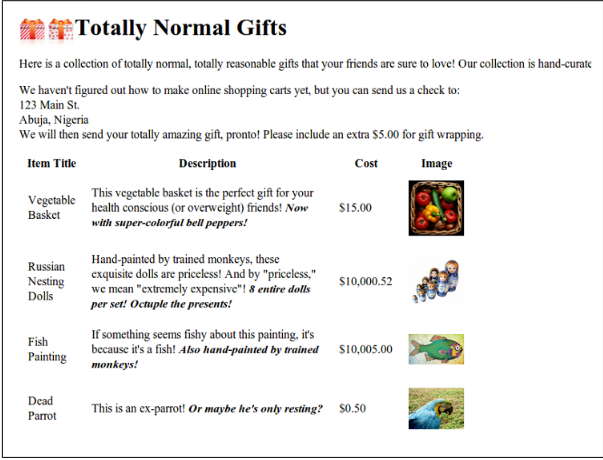

**Children and other descendants**

In [10]:
# find only descandants that are children
for child in bs.find('table', {'id': 'giftList'}).children:
    print(child)
    
# all descendants
# for des in bs.find('table', {'id': 'giftList'}).descendants:



<tr><th>
Item Title
</th><th>
Description
</th><th>
Cost
</th><th>
Image
</th></tr>


<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="../img/gifts/img1.jpg"/>
</td></tr>


<tr class="gift" id="gift2"><td>
Russian Nesting Dolls
</td><td>
Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
</td><td>
$10,000.52
</td><td>
<img src="../img/gifts/img2.jpg"/>
</td></tr>


<tr class="gift" id="gift3"><td>
Fish Painting
</td><td>
If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
</td><td>
$10,005.00
</td><td>
<img src="../img/gifts/img3.jpg"/>


**Siblings**

In [11]:
for sibling in bs.find('table', {'id':'giftList'}).tr.next_siblings:  # or previous_siblings
    print(sibling)



<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="../img/gifts/img1.jpg"/>
</td></tr>


<tr class="gift" id="gift2"><td>
Russian Nesting Dolls
</td><td>
Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
</td><td>
$10,000.52
</td><td>
<img src="../img/gifts/img2.jpg"/>
</td></tr>


<tr class="gift" id="gift3"><td>
Fish Painting
</td><td>
If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
</td><td>
$10,005.00
</td><td>
<img src="../img/gifts/img3.jpg"/>
</td></tr>


<tr class="gift" id="gift4"><td>
Dead Parrot
</td><td>
This is an ex-parr

**Parents**

In [12]:
print(bs.find('img', {'src':'../img/gifts/img1.jpg'})
                      .parent.previous_sibling.get_text())


$15.00



### Regular Expressions

In [13]:
import re
 
# prints only the relative image paths that start with ../img/gifts/img and end with .jpg
images = bs.find_all('img', {'src': re.compile('\.\.\/img\/gifts/img.*\.jpg')})
for image in images:
    print(image['src'])
    # print(image.attrs['src']) -> accessing attributes

../img/gifts/img1.jpg
../img/gifts/img2.jpg
../img/gifts/img3.jpg
../img/gifts/img4.jpg
../img/gifts/img6.jpg


In [14]:
# lambda expressions

bs.find_all(lambda tag: tag.get_text() == 'Or maybe he\'s only resting?')
# bs.find_all('', string='Or maybe he\'s only resting?')

[<span class="excitingNote">Or maybe he's only resting?</span>]

In [15]:
# check from # of attributes in tag
bs.find_all(lambda tag: len(tag.attrs) == 1)

[<div id="wrapper">
 <img src="../img/gifts/logo.jpg" style="float:left;"/>
 <h1>Totally Normal Gifts</h1>
 <div id="content">Here is a collection of totally normal, totally reasonable gifts that your friends are sure to love! Our collection is
 hand-curated by well-paid, free-range Tibetan monks.<p>
 We haven't figured out how to make online shopping carts yet, but you can send us a check to:<br/>
 123 Main St.<br/>
 Abuja, Nigeria
 We will then send your totally amazing gift, pronto! Please include an extra $5.00 for gift wrapping.</p></div>
 <table id="giftList">
 <tr><th>
 Item Title
 </th><th>
 Description
 </th><th>
 Cost
 </th><th>
 Image
 </th></tr>
 <tr class="gift" id="gift1"><td>
 Vegetable Basket
 </td><td>
 This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
 <span class="excitingNote">Now with super-colorful bell peppers!</span>
 </td><td>
 $15.00
 </td><td>
 <img src="../img/gifts/img1.jpg"/>
 </td></tr>
 <tr class="gift" id="gift

## Web Crawlers
### Transversing Single Domain
- Six Degrees of Wikipedia: link two unlikely subjects with the fewest clicks 

In [16]:
html = urlopen('https://en.wikipedia.org/wiki/Kevin_Bacon')
bs = BeautifulSoup(html, 'html.parser')

# crawl for href (indicator of the desitnation of hyperlink)
for link in bs.find_all('a'):
    if 'href' in link.attrs:
        print(link.attrs['href'])

#bodyContent
/wiki/Main_Page
/wiki/Wikipedia:Contents
/wiki/Portal:Current_events
/wiki/Special:Random
/wiki/Wikipedia:About
//en.wikipedia.org/wiki/Wikipedia:Contact_us
https://donate.wikimedia.org/wiki/Special:FundraiserRedirector?utm_source=donate&utm_medium=sidebar&utm_campaign=C13_en.wikipedia.org&uselang=en
/wiki/Help:Contents
/wiki/Help:Introduction
/wiki/Wikipedia:Community_portal
/wiki/Special:RecentChanges
/wiki/Wikipedia:File_upload_wizard
/wiki/Main_Page
/wiki/Special:Search
/w/index.php?title=Special:CreateAccount&returnto=Kevin+Bacon
/w/index.php?title=Special:UserLogin&returnto=Kevin+Bacon
/w/index.php?title=Special:CreateAccount&returnto=Kevin+Bacon
/w/index.php?title=Special:UserLogin&returnto=Kevin+Bacon
/wiki/Help:Introduction
/wiki/Special:MyContributions
/wiki/Special:MyTalk
#
#Early_life_and_education
#Acting_career
#Early_work
#1980s
#1990s
#2000s
#2010s
#Other_ventures
#Six_Degrees_of_Kevin_Bacon
#Personal_life
#Accolades
#Awards_and_nominations
#Other_honors
#S

Try crawling article links:
1. reside within <i>div</i> with the <i>id</i> set to <i>bodyContent</i>
2. URLs don't contain colons
3. URLs begin with /wiki/

In [17]:
for link in bs.find('div', {'id': 'bodyContent'})\
                .find_all('a', href = re.compile('^(/wiki/)((?!:).)*$')):
    if 'href' in link.attrs:
        print(link.attrs['href'])

/wiki/Kevin_Bacon_(disambiguation)
/wiki/Philadelphia
/wiki/Kevin_Bacon_filmography
/wiki/Kyra_Sedgwick
/wiki/Sosie_Bacon
/wiki/Edmund_Bacon_(architect)
/wiki/Michael_Bacon_(musician)
/wiki/Leading_man
/wiki/Character_actor
/wiki/Golden_Globe_Award
/wiki/Screen_Actors_Guild_Award
/wiki/Primetime_Emmy_Award
/wiki/National_Lampoon%27s_Animal_House
/wiki/Footloose_(1984_film)
/wiki/Diner_(1982_film)
/wiki/JFK_(film)
/wiki/A_Few_Good_Men
/wiki/Apollo_13_(film)
/wiki/Mystic_River_(film)
/wiki/Frost/Nixon_(film)
/wiki/Friday_the_13th_(1980_film)
/wiki/Tremors_(1990_film)
/wiki/The_River_Wild
/wiki/The_Woodsman_(2004_film)
/wiki/Crazy,_Stupid,_Love
/wiki/Patriots_Day_(film)
/wiki/Losing_Chase
/wiki/Loverboy_(2005_film)
/wiki/Golden_Globe_Award_for_Best_Actor_%E2%80%93_Miniseries_or_Television_Film
/wiki/Screen_Actors_Guild_Award_for_Outstanding_Performance_by_a_Male_Actor_in_a_Miniseries_or_Television_Movie
/wiki/Michael_Strobl
/wiki/HBO
/wiki/Taking_Chance
/wiki/Fox_Broadcasting_Company
/wik

In [18]:
import random

# define a universal function for crawling any URLs
random.seed(random.randint(1, 100))

def getLinks(articleUrl):
    html = urlopen('http://en.wikipedia.org{}'.format(articleUrl))
    bs = BeautifulSoup(html, 'html.parser')
    
    return bs.find('div', {'id':'bodyContent'})\
                .find_all('a',href=re.compile('^(/wiki/)((?!:).)*$'))

# random crawl href attributes
links = getLinks('/wiki/Kevin_Bacon')
count = 0
while len(links) > 0 and count != 10:
    newArticle = links[random.randint(0, len(links)-1)].attrs['href']
    print(newArticle)
    links = getLinks(newArticle)
    count += 1

/wiki/Antireligion
/wiki/List_of_secular_humanists
/wiki/American_Humanist_Association
/wiki/Washington,_D.C.
/wiki/American_Sign_Language
/wiki/French_Sign_Language_family
/wiki/French_Belgian_Sign_Language
/wiki/Cena_(sign_language)
/wiki/ISO_639-3
/wiki/Market_Identifier_Code


### Collecting Data Across the Entire Site
Let's say we want to crawl:
- all titles (under h1 -> span tags)
- first paragraph (body#mw-content-text -> p)
- link to edit the page, if available (li#ca-edit -> span -> a)\
Note: Handling redirect
    - urllib handles redirect automatically
    - *requests* library, make sure to set *allow_redirects=True* -> requests.get(url, allow_redirects=True>

In [19]:
pages = set()  # use for checking duplicate pages

def getLinks(pageUrl):
    global pages
    html = urlopen('http://en.wikipedia.org{}'.format(pageUrl))
    bs = BeautifulSoup(html, 'html.parser')
    
    try:
        print(bs.h1.get_text())  # title
        print(bs.find(id ='mw-content-text').find_all('p')[0])  # first paragraph
        print(bs.find(id='ca-edit').find('span').find('a').attrs['href'])  # link to edit
    except AttributeError:
        print('This page is missing something! Continuing.')

    for link in bs.find_all('a', href=re.compile('^(/wiki/)')):
        if 'href' in link.attrs:
            if link.attrs['href'] not in pages:
                #We have encountered a new page
                newPage = link.attrs['href']
                print('-'*20)
                print(newPage)
                pages.add(newPage)
                getLinks(newPage)
    
getLinks('')

Main Page
<p><b><a href="/wiki/Cyclone_Taylor" title="Cyclone Taylor">Cyclone Taylor</a></b> (June 23, 1884 – June 9, 1979) was a Canadian professional <a href="/wiki/Ice_hockey" title="Ice hockey">ice hockey</a> player and <a href="/wiki/Civil_service" title="Civil service">civil servant</a>. Born and raised in <a href="/wiki/Southern_Ontario" title="Southern Ontario">Southern Ontario</a>, Taylor moved to <a href="/wiki/Houghton,_Michigan" title="Houghton, Michigan">Houghton, Michigan</a>, and played in the <a href="/wiki/International_Professional_Hockey_League" title="International Professional Hockey League">International Hockey League</a> for two years. He then joined the <a href="/wiki/Ottawa_Senators_(original)" title="Ottawa Senators (original)">Ottawa Senators</a>, winning the <a href="/wiki/Stanley_Cup" title="Stanley Cup">Stanley Cup</a> with the team in his second year. While in Ottawa he began working as an immigration clerk. Two years later he signed with the <a href="/wi

Wikipedia:Community portal
<p class="mw-empty-elt">
</p>
This page is missing something! Continuing.
--------------------
/wiki/Special:RecentChanges
Recent changes
<p>This is a list of recent changes to Wikipedia.
</p>
This page is missing something! Continuing.
--------------------
/wiki/Wikipedia:File_upload_wizard
Wikipedia:File upload wizard
<p>Thank you for offering to contribute an image or other media file for use on Wikipedia. This wizard will guide you through a questionnaire prompting you for the appropriate copyright and sourcing information for each file. Please ensure you understand <a href="/wiki/Wikipedia:Copyrights" title="Wikipedia:Copyrights">copyright</a> and the <a href="/wiki/Wikipedia:Image_use_policy" title="Wikipedia:Image use policy">image use policy</a> before proceeding.
</p>
This page is missing something! Continuing.
--------------------
/wiki/Special:Search
Search


IndexError: list index out of range

### Crawling across the internet

**urlparse**: parser URL into 6 components
1. scheme: URL scheme specifier
2. netloc: network location part
3. path: Hierarchical path
4. params: parameter for last path element
5. fragment: fragment identifier

In [23]:
urlparse("http://docs.python.org:80/3/library/urllib.parse.html?"
         "highlight=params#url-parsing")

ParseResult(scheme='http', netloc='docs.python.org:80', path='/3/library/urllib.parse.html', params='', query='highlight=params', fragment='url-parsing')

**Random external links crawler**
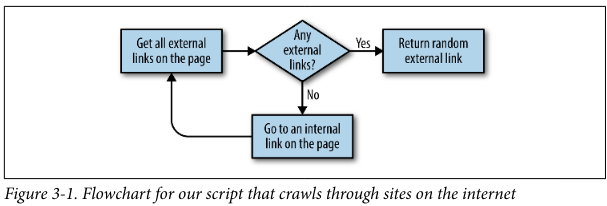

In [20]:
pages = set()
random.seed(random.randint(1, 100))

# Retrieves a list of all Internal links found on a page
def getInternalLinks(bs, includeUrl):
    includeUrl = '{}://{}'.format(urlparse(includeUrl).scheme,
                                  urlparse(includeUrl).netloc)
    internalLinks = []
    
    # Finds all links that begin with a "/"
    for link in bs.find_all('a', href=re.compile('^(/|.*'+includeUrl+')')):
        if link.attrs['href'] is not None:
            if link.attrs['href'] not in internalLinks:
                if(link.attrs['href'].startswith('/')):
                    internalLinks.append(includeUrl+link.attrs['href'])
        else:
            internalLinks.append(link.attrs['href'])
            
    return internalLinks

# Retrieves a list of all external links found on a page
def getExternalLinks(bs, excludeUrl):
    externalLinks = []
    
    # Finds all links that start with "http" that do
    # not contain the current URL
    for link in bs.find_all('a', href=re.compile('^(http|www)((?!'+excludeUrl+').)*$')):
        if link.attrs['href'] is not None:
            if link.attrs['href'] not in externalLinks:
                externalLinks.append(link.attrs['href'])
                
    return externalLinks

In [21]:
def getRandomExternalLink(startingPage):
    try:
        html = urlopen(startingPage)
    except HTTPError as e:
        print(f"HTTPError: {e.code} - {e.reason}")
    except URLError as e:
        print(f"URLError: {e.code} - {e.reason}")
    
    bs = BeautifulSoup(html, 'html.parser')
    externalLinks = getExternalLinks(bs, urlparse(startingPage).netloc)
    
    if len(externalLinks) == 0:
        print('No external links, looking around the site for one')
        domain = '{}://{}'.format(urlparse(startingPage).scheme, urlparse(startingPage).netloc)
        internalLinks = getInternalLinks(bs, domain)
        
        return getRandomExternalLink(internalLinks[random.randint(0, len(internalLinks)-1)])
    else:
        return externalLinks[random.randint(0, len(externalLinks)-1)]
    
def followExternalOnly(startingSite):
    externalLink = getRandomExternalLink(startingSite)
    print('Random external link is: {}'.format(externalLink))
    followExternalOnly(externalLink)
    
# followExternalOnly('http://oreilly.com')

Add the stored variables
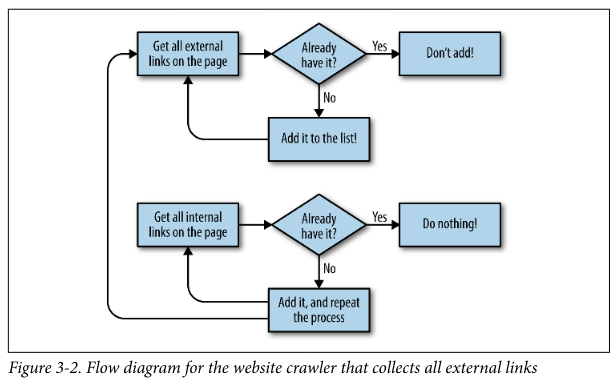

In [25]:
# Collects a list of all external URLs found on the site
allExtLinks = set()
allIntLinks = set()

def getAllExternalLinks(siteUrl):
    html = urlopen(siteUrl)
    domain = '{}://{}'.format(urlparse(siteUrl).scheme,
                              urlparse(siteUrl).netloc)
    bs = BeautifulSoup(html, 'html.parser')
    
    internalLinks = getInternalLinks(bs, domain)
    externalLinks = getExternalLinks(bs, domain)
    
    # we print only the external links due to our purpose
    for link in externalLinks:
        if link not in allExtLinks and len(allExtLinks) != 100:  # limitation
            allExtLinks.add(link)
            print(link)
        else:
            continue
            
    for link in internalLinks:
        if link not in allIntLinks and len(allIntLinks) != 50:
            allIntLinks.add(link)
            getAllExternalLinks(link)
            allIntLinks.add('http://oreilly.com')

getAllExternalLinks('http://oreilly.com')

https://www.oreilly.com
https://www.oreilly.com/member/login/
https://www.oreilly.com/online-learning/try-now.html
https://www.oreilly.com/online-learning/teams.html
https://www.oreilly.com/online-learning/government.html
https://www.oreilly.com/online-learning/academic.html
https://www.oreilly.com/online-learning/individuals.html
https://www.oreilly.com/online-learning/features.html
https://www.oreilly.com/online-learning/courses.html
https://www.oreilly.com/online-learning/feature-certification.html
https://www.oreilly.com/online-learning/intro-interactive-learning.html
https://www.oreilly.com/online-learning/live-events.html
https://www.oreilly.com/online-learning/feature-answers.html
https://www.oreilly.com/online-learning/insights-dashboard.html
https://www.oreilly.com/radar/
https://www.oreilly.com/content-marketing-solutions.html
https://www.oreilly.com/pub/pr/3456
https://learning.oreilly.com/start-trial/
https://www.oreilly.com/about/oreilly-approach-to-generative-ai.html
http

## Web Crawling Models 
### Dealing with Different Website Layouts
1. create crawling function for each website

In [26]:
class Content:
    def __init__(self, url, title, body):
        self.url = url
        self.title = title
        self.body = body

def getPage(url):
    req = requests.get(url)
    return BeautifulSoup(req.text, 'html.parser')

# crawling function for NYTimes website
def scrapeQuotes(url):
    bs = getPage(url)
    title = bs.find('h1').text
    lines = bs.find('span', {'class': 'text'})
    body = '\n'.join([line.text for line in lines])
    return Content(url, title, body)

# crawling function for scrapeBrookings website
def scrapeBrookings(url):
    bs = getPage(url)
    title = bs.find("h1").text
    body = bs.find("div", {"class": 'byo-block -narrow wysiwyg-block wysiwyg'}).text
    return Content(url, title, body)

url = 'https://www.brookings.edu/blog/future-development'\
        '/2018/01/26/delivering-inclusive-urban-access-3-unc'\
        'omfortable-truths/'
content = scrapeBrookings(url)
print('Title: {}'.format(content.title))
print('URL: {}\n'.format(content.url))
print(content.body)

url = 'https://quotes.toscrape.com/'
content = scrapeQuotes(url)
print('Title: {}'.format(content.title))
print('URL: {}\n'.format(content.url))
print(content.body)

Title: Delivering inclusive urban access: 3 uncomfortable truths
URL: https://www.brookings.edu/blog/future-development/2018/01/26/delivering-inclusive-urban-access-3-uncomfortable-truths/


The past few decades have been filled with a deep optimism about the role of cities and suburbs across the world. These engines of economic growth host a majority of world population, are major drivers of economic innovation, and have created pathways to opportunities for untold amounts of people.

Title: 
Quotes to Scrape

URL: https://quotes.toscrape.com/

“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”


2. make a flexible function for using with all websites

In [27]:
class Content:
    """ Common base class for all articles/pages """

    def __init__(self, url, title, body):
        self.url = url
        self.title = title
        self.body = body
    
    def print(self):
        """
        Flexible printing function controls output
        """
        print("URL: {}".format(self.url))
        print("TITLE: {}".format(self.title))
        print("BODY:\n{}".format(self.body))
    
class Website:  
    """ Contains information about website structure"""

    def __init__(self, name, url, titleTag, bodyTag):
        self.name = name
        self.url = url
        self.titleTag = titleTag
        self.bodyTag = bodyTag
        

class Crawler:
    def getPage(self, url):
        try:
            req = requests.get(url)
        except requests.exceptions.RequestException:
            print('URLError')
            return None
    
        return BeautifulSoup(req.text, 'html.parser')
    
    def safeGet(self, pageObj, selector):
        """
        Utility function used to get a content string from a
        Beautiful Soup object and a selector. Returns an empty
        string if no object is found for the given selector
        """
        selectedElems = pageObj.select(selector)  # select: get a content string from CSS selector
        if selectedElems is not None and len(selectedElems) > 0:
            return '\n'.join([elem.get_text() for elem in selectedElems])
        
        return ''

    def parse(self, site, url):
        """
        Extract content from a given page URL
        """
        bs = self.getPage(url)
        if bs is not None:
            title = self.safeGet(bs, site.titleTag)
            body = self.safeGet(bs, site.bodyTag)
            if title != '' and body != '':
                content = Content(url, title, body)
                content.print()

In [28]:
crawler = Crawler()

# name, url, title, body
siteData = [
    ['O\'Reilly Media', 'http://oreilly.com', 'h1', 'section#trial-overlay'],  # class: trial-overlay
    ['Reuters', 'http://reuters.com', 'h1', 'div'],  # . refers to element in any attributes
    ['Brookings', 'http://www.brookings.edu', 'h1', 'div.byo-block -narrow wysiwyg-block wysiwyg'],
    ['New York Times', 'http://nytimes.com', 'h1', 'p.story-content']
]
websites = []

for row in siteData:
    websites.append(Website(row[0], row[1], row[2], row[3]))
    
crawler.parse(websites[0], 'http://shop.oreilly.com/product/'\
 '0636920028154.do')
crawler.parse(websites[1], 'http://www.reuters.com/article/'\
 'us-usa-epa-pruitt-idUSKBN19W2D0')
crawler.parse(websites[2], 'https://www.brookings.edu/blog/future-development'\
        '/2018/01/26/delivering-inclusive-urban-access-3-uncomfortable-truths/')
crawler.parse(websites[3], 'https://www.nytimes.com/2018/01/'\
 '28/business/energy-environment/oil-boom.html')

URL: http://shop.oreilly.com/product/0636920028154.do
TITLE: Learning Python, 5th Edition
BODY:


Get full access to Learning Python, 5th Edition and 60K+ other titles, with a free 10-day trial of O'Reilly.
There are also live events, courses curated by job role, and more.

Start your free trial






### Structuring Crawlers
1. Crawling Sites though Search
- searchUrl: defines where you should go to get seach results
- resultListing: 'box' that hold information for each result
- resultUrl: defines tag inside the box that will give you the exact URL
- abosuluteUrl: boolean that tells you whether these search results are absolute or relative URLs

In [30]:
class Content:
    """Common base class for all articles/pages"""
    def __init__(self, topic, url, title, body):
        self.topic = topic
        self.title = title
        self.body = body
        self.url = url
        
    def print(self):
        """
        Flexible printing function controls output
        """
        print("New article found for topic: {}".format(self.topic))
        print("TITLE: {}".format(self.title))
        print("BODY:\n{}".format(self.body))
        print("URL: {}".format(self.url)) 
        
class Website:
    """Contains information about website structure"""
    def __init__(self, name, url, searchUrl, resultListing, resultUrl, absoluteUrl, titleTag, bodyTag):
        self.name = name
        self.url = url
        self.searchUrl = searchUrl
        self.resultListing = resultListing
        self.resultUrl = resultUrl
        self.absoluteUrl=absoluteUrl
        self.titleTag = titleTag
        self.bodyTag = bodyTag

In [35]:
class Crawler:
    def getPage(self, url):
        try:
            req = requests.get(url)
        except requests.exceptions.RequestException:
            return None
        return BeautifulSoup(req.text, 'html.parser')

    def safeGet(self, pageObj, selector):
        childObj = pageObj.select(selector)
        if childObj is not None and len(childObj) > 0:
            return childObj[0].get_text()
        return ""

    def search(self, topic, site):
        """
        Searches a given website for a given topic and records all pages found
        """
        bs = self.getPage(site.searchUrl + topic)
        searchResults = bs.select(site.resultListing)
        for result in searchResults:
            url = result.select(site.resultUrl)[0].attrs["href"]
            
            # Check to see whether it's a relative or an absolute URL
            if(site.absoluteUrl):
                bs = self.getPage(url)
            else:
                bs = self.getPage(site.url + url)
            
            if bs is None:
                print("Something was wrong with that page or URL. Skipping!")
                return

            title = self.safeGet(bs, site.titleTag)
            body = self.safeGet(bs, site.bodyTag)
            if title != '' and body != '':
                content = Content(topic, title, body, url)
                content.print()

In [37]:
crawler = Crawler()

# name, url, title, body
siteData = [
    ['O\'Reilly Media', 'http://oreilly.com', 'https://ssearch.oreilly.com/?q=', 'article',
     'div.', True, 'h1', 'section#trial-overlay'],
    ['Brookings', 'http://www.brookings.edu', 'https://www.brookings.edu/search/?s=', 'div.list-content article', 
     'h4.title a', True, 'h1', 'div.post-body']
]
sites = []

for row in siteData:
        sites.append(Website(row[0], row[1], row[2], row[3], 
                             row[4], row[5], row[6], row[7]))
    
topics = ['python', 'data science']
for topic in topics:
    print('GETTING INFO ABOUT: ' + topic)
    for targetSite in sites:
        crawler.search(topic, targetSite)

GETTING INFO ABOUT: python
GETTING INFO ABOUT: data science


2. Crawling Sites though Links

In [38]:
class Website:
    def __init__(self, name, url, targetPattern, absoluteUrl, titleTag, bodyTag):
        self.name = name
        self.url = url
        self.targetPattern = targetPattern
        self.absoluteUrl=absoluteUrl
        self.titleTag = titleTag
        self.bodyTag = bodyTag

class Content:
    def __init__(self, url, title, body):
        self.url = url
        self.title = title
        self.body = body
        
    def print(self):
        print("URL: {}".format(self.url))
        print("TITLE: {}".format(self.title))
        print("BODY:\n{}".format(self.body))

In [39]:
class Crawler:
    def __init__(self, site):
        self.site = site
        self.visited = []

    def getPage(self, url):
        try:
            req = requests.get(url)
        except requests.exceptions.RequestException:
            return None
        return BeautifulSoup(req.text, 'html.parser')
    
    def safeGet(self, pageObj, selector):
        selectedElems = pageObj.select(selector)
        
        if selectedElems is not None and len(selectedElems) > 0:
            return '\n'.join([elem.get_text() for elem in selectedElems])
        return ''

    def parse(self, url):
        bs = self.getPage(url)
        if bs is not None:
            title = self.safeGet(bs, self.site.titleTag)
            body = self.safeGet(bs, self.site.bodyTag)
            
            if title != '' and body != '':
                content = Content(url, title, body)
                content.print()
        
    def crawl(self):
        """
         Get pages from website home page
         """
        bs = self.getPage(self.site.url)
        targetPages = bs.findAll('a', href=re.compile(self.site.targetPattern))
        for targetPage in targetPages:
            targetPage = targetPage.attrs['href']
            if targetPage not in self.visited:
                self.visited.append(targetPage)
                if not self.site.absoluteUrl:
                    targetPage = '{}{}'.format(self.site.url, targetPage)
                    self.parse(targetPage)

In [45]:
orielly = Website('Orielly', 'http://oreilly.com', '^(/product/)', False, 'h1', 'div')
crawler = Crawler(orielly)
crawler.crawl()